In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np #in realtÃ  Ã¨ usata

df = pd.read_csv("Excel/Biochemical_parameters.csv", names=["ID", "Data", "Parametro", "Valore"])

indici_da_droppare = df[df['Parametro'] == 'Name'].index
df = df.drop(indici_da_droppare)
df1 = df
df3 = df

df2 = pd.read_csv("Excel/Diagnostics.csv", names=["ID", "Codice", "Complicanza"])

df.describe()

ID        Data   Parametro Valore
count       87482       87482       87482  87482
unique        723        1370          17   8192
top     LIB193438  2021-04-14  Creatinine    0.7
freq          846         254        8495   2638

In [35]:
def modified_z_score(series):
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return np.zeros_like(series)
    return 0.6745 * (series - median) / mad

# Dizionario con unitÃ , intervallo normale e intervallo fuori norma (ma possibili)
param_info = {
    "Creatinine": {"unit": "mg/dL", "normal": (0.6, 1.2), "abnormal": (1.3, 4.0)},
    "Glucose": {"unit": "mg/dL", "normal": (70, 100), "abnormal": ((0, 69), (101, 140))},
    "Potassium": {"unit": "mEq/L", "normal": (3.5, 5.0), "abnormal": ((0, 3.4), (5.1, 6.5))},
    "Sodium": {"unit": "mEq/L", "normal": (136, 146), "abnormal": ((0, 135), (147, 155))},
    "Alanine transaminase (GPT)": {"unit": "U/L", "normal": (7, 56), "abnormal": (57, 100)},
    "Gamma-glutamyl Transferase (GGT)": {"unit": "U/L", "normal": (8, 61), "abnormal": (62, 200)},
    "Total cholesterol": {"unit": "mg/dL", "normal": (0, 200), "abnormal": (201, 299)},
    "Triglycerides": {"unit": "mg/dL", "normal": (0, 150), "abnormal": (151, 500)},
    "HDL cholesterol": {"unit": "mg/dL", "normal": (40, None), "abnormal": (0, 39)},
    "Uric acid": {"unit": "mg/dL", "normal": (3.0, 8.2), "abnormal": ((0, 2.9), (8.3, 12.0))},
    "Glycated hemoglobin (A1c)": {"unit": "%", "normal": (0, 5.7), "abnormal": (5.8, 14.0)},
    "Thyrotropin (TSH)": {"unit": "ÂµUI/L", "normal": (0.4, 4.0), "abnormal": (4.1, 20.0)},
    "Creatinine (urine)": {"unit": "mg/dL", "normal": (((29, 226), "donne"), ((40, 274), "uomini")), "abnormal": ((0, 29), (274, None))},
    "Albumin (urine)": {"unit": "mg/dL", "normal": (0, 30), "abnormal": (31, 300)},
    "Chlorine": {"unit": "mEq/L", "normal": (95, 105), "abnormal": ((0, 94), (106, 120))},
    "IA2 ANTIBODIES": {"unit": "U/mL", "normal": (0.0, 7.4), "abnormal": (7.5, 100.0)},
    "Insulin": {"unit": "ÂµUI/mL", "normal": (2.6, 24.9), "abnormal": (25.0, 100.0)}
}

def analisi_parametri(df):
    summary = []
    
    df = df[df["Parametro"] != "Name"]

    for nome, gruppo in df.groupby("Parametro"):
        valori = pd.to_numeric(gruppo["Valore"], errors='coerce')
        totale = len(valori)
        id_unici = gruppo["ID"].nunique()
        mancanti = 723 - id_unici
        
        min = valori.min()
        max = valori.max()
        mean= valori.mean()
        std_val = valori.std()
        # Modified Z-score
        z_scores = modified_z_score(valori)
        z_outliers_idx = np.where(np.abs(z_scores) > 5)[0]
        
        # Valori negativi
        valori_negativi_idx = valori[valori < 0].index

        # Unione degli outlier evitando doppioni
        outlier_idx_unici = set(z_outliers_idx).union(valori_negativi_idx)
        outliers = len(outlier_idx_unici)

        info = param_info.get(nome, {})
        unit = info.get("unit", "")
        normal = info.get("normal", (None, None))
        abnormal = info.get("abnormal", None)

        summary.append([
            nome,
            unit,
            f"{normal[0]}â€“{normal[1] if normal[1] is not None else ''}",
            str(abnormal),
            totale,
            mancanti,
            min,
            mean,
            max,
            std_val,
            outliers,
        ])
    
    return pd.DataFrame(summary, columns=[
        "Parametro",
        "UnitÃ ",
        "Range Normale",
        "Range Fuori Norma (possibile)",
        "Valori Totali",
        "Persone senza esame",
        "Minimo",
        "Media",
        "Massimo",
        "Dev. Std",
        "Outliers",
    ])

# Esegui e stampa
tabella_sintesi = analisi_parametri(df)
tabella_sintesi

Parametro   UnitÃ   \
0         Alanine transaminase (GPT)     U/L   
1                    Albumin (urine)   mg/dL   
2                           Chlorine   mEq/L   
3                         Creatinine   mg/dL   
4                 Creatinine (urine)   mg/dL   
5   Gamma-glutamyl Transferase (GGT)     U/L   
6                            Glucose   mg/dL   
7          Glycated hemoglobin (A1c)       %   
8                    HDL cholesterol   mg/dL   
9                     IA2 ANTIBODIES    U/mL   
10                           Insulin  ÂµUI/mL   
11                         Potassium   mEq/L   
12                            Sodium   mEq/L   
13                 Thyrotropin (TSH)   ÂµUI/L   
14                 Total cholesterol   mg/dL   
15                     Triglycerides   mg/dL   
16                         Uric acid   mg/dL   

                                 Range Normale Range Fuori Norma (possibile)  \
0                                         7â€“56                     (57, 100)   
1                                         0â€“30                     (31, 300)   
2                                       95â€“105         ((0, 94), (106, 120))   
3                                      0.6â€“1.2                    (1.3, 4.0)   
4   ((29, 226), 'donne')â€“((40, 274), 'uomini')        ((0, 29), (274, None))   
5                                         8â€“61                     (62, 200)   
6                                       70â€“100         ((0, 69), (101, 140))   
7                                        0â€“5.7                   (5.8, 14.0)   
8                                          40â€“                       (0, 39)   
9                                      0.0â€“7.4                  (7.5, 100.0)   
10                                    2.6â€“24.9                 (25.0, 100.0)   
11                                     3.5â€“5.0        ((0, 3.4), (5.1, 6.5))   
12                                     136â€“146        ((0, 135), (147, 155))   
13                                     0.4â€“4.0                   (4.1, 20.0)   
14                                       0â€“200                    (201, 299)   
15                                       0â€“150                    (151, 500)   
16                                     3.0â€“8.2       ((0, 2.9), (8.3, 12.0))   

    Valori Totali  Persone senza esame   Minimo       Media  Massimo  \
0            7134                    1   -4.000   26.981679   868.00   
1            4283                   10    0.010    4.863133   992.20   
2            1935                  300   76.000  102.961395   136.00   
3            8495                    0    0.150    1.044406    11.55   
4            4412                   10    2.000  114.140306   543.46   
5            6085                    7    5.000   43.800016  2051.00   
6            8349                    0   10.000  163.035274   979.00   
7            4776                    3    4.000    7.823137    18.00   
8            5062                    6    7.000   56.626827   137.00   
9              66                  659    0.210  409.637424  6446.74   
10             64                  674    0.740   22.694688   298.50   
11           7853                    1    1.900    4.430804    22.60   
12           7814                    1  117.000  138.163053   168.00   
13           4570                    9    0.006    2.866165   204.89   
14           5954                    3   27.000  169.454825   703.00   
15           5791                    3   23.000  102.973925  3447.00   
16           4839                   15    1.000    4.392238    14.20   

       Dev. Std  Outliers  
0     44.617123       302  
1     26.560691         0  
2      5.339634         9  
3      0.947799       656  
4     66.798995         7  
5    113.549983       642  
6     85.403559        41  
7      1.385512        48  
8     14.367272         8  
9   1237.697950        25  
10    40.537998         6  
11     0.658540        37  
12     3.466266        

In [33]:
ids_con_complicanze = df2["ID"].unique()

# 2. Dividiamo df1 in due dataset
df_con_complicanze = df1[df1["ID"].isin(ids_con_complicanze)]
df_senza_complicanze = df1[~df1["ID"].isin(ids_con_complicanze)]

# 3. Eseguiamo analisi_parametri su ciascuno
tabella_con = analisi_parametri(df_con_complicanze)
tabella_senza = analisi_parametri(df_senza_complicanze)

tabella_con

Parametro   UnitÃ   \
0         Alanine transaminase (GPT)     U/L   
1                    Albumin (urine)   mg/dL   
2                           Chlorine   mEq/L   
3                         Creatinine   mg/dL   
4                 Creatinine (urine)   mg/dL   
5   Gamma-glutamyl Transferase (GGT)     U/L   
6                            Glucose   mg/dL   
7          Glycated hemoglobin (A1c)       %   
8                    HDL cholesterol   mg/dL   
9                     IA2 ANTIBODIES    U/mL   
10                           Insulin  ÂµUI/mL   
11                         Potassium   mEq/L   
12                            Sodium   mEq/L   
13                 Thyrotropin (TSH)   ÂµUI/L   
14                 Total cholesterol   mg/dL   
15                     Triglycerides   mg/dL   
16                         Uric acid   mg/dL   

                                 Range Normale Range Fuori Norma (possibile)  \
0                                         7â€“56                     (57, 100)   
1                                         0â€“30                     (31, 300)   
2                                       95â€“105         ((0, 94), (106, 120))   
3                                      0.6â€“1.2                    (1.3, 4.0)   
4   ((29, 226), 'donne')â€“((40, 274), 'uomini')        ((0, 29), (274, None))   
5                                         8â€“61                     (62, 200)   
6                                       70â€“100         ((0, 69), (101, 140))   
7                                        0â€“5.7                   (5.8, 14.0)   
8                                          40â€“                       (0, 39)   
9                                      0.0â€“7.4                  (7.5, 100.0)   
10                                    2.6â€“24.9                 (25.0, 100.0)   
11                                     3.5â€“5.0        ((0, 3.4), (5.1, 6.5))   
12                                     136â€“146        ((0, 135), (147, 155))   
13                                     0.4â€“4.0                   (4.1, 20.0)   
14                                       0â€“200                    (201, 299)   
15                                       0â€“150                    (151, 500)   
16                                     3.0â€“8.2       ((0, 2.9), (8.3, 12.0))   

    Valori Totali  Non Hanno Fatto lâ€™Esame   Minimo       Media  Massimo  \
0            5545                      225   -4.000   28.036339   868.00   
1            3162                      228    0.120    5.705658   992.20   
2            1635                      407   76.000  102.986116   136.00   
3            6684                      225    0.150    1.088235    11.55   
4            3267                      228    2.000  106.331301   515.79   
5            4724                      228    5.000   46.240157  1903.00   
6            6547                      225   13.000  164.128914   790.00   
7            3490                      226    4.000    7.810946    16.40   
8            3787                      228    7.000   56.778189   132.00   
9              40                      683    0.210  182.815750  6446.74   
10             41                      692    0.740   21.626098   298.50   
11           6181                      226    1.900    4.452459    22.60   
12           6140                      226  117.000  138.094756   168.00   
13           3371                      231    0.006    2.925733   204.89   
14           4520                      227   27.000  169.472792   703.00   
15           4386                      227   23.000  107.182399  3447.00   
16           3674                      234    1.500    4.456543    14.20   

       Dev. Std  Outliers  
0     46.747188       266  
1     29.828967         0  
2      5.533705         9  
3      1.025362       517  
4     63.222186         8  
5    111.824547       507  
6     84.477618        27  
7      1.353676        29  
8     14.687407         6  
9   1016.574265        14  
10   

In [34]:
tabella_senza

Parametro   UnitÃ   \
0         Alanine transaminase (GPT)     U/L   
1                    Albumin (urine)   mg/dL   
2                           Chlorine   mEq/L   
3                         Creatinine   mg/dL   
4                 Creatinine (urine)   mg/dL   
5   Gamma-glutamyl Transferase (GGT)     U/L   
6                            Glucose   mg/dL   
7          Glycated hemoglobin (A1c)       %   
8                    HDL cholesterol   mg/dL   
9                     IA2 ANTIBODIES    U/mL   
10                           Insulin  ÂµUI/mL   
11                         Potassium   mEq/L   
12                            Sodium   mEq/L   
13                 Thyrotropin (TSH)   ÂµUI/L   
14                 Total cholesterol   mg/dL   
15                     Triglycerides   mg/dL   
16                         Uric acid   mg/dL   

                                 Range Normale Range Fuori Norma (possibile)  \
0                                         7â€“56                     (57, 100)   
1                                         0â€“30                     (31, 300)   
2                                       95â€“105         ((0, 94), (106, 120))   
3                                      0.6â€“1.2                    (1.3, 4.0)   
4   ((29, 226), 'donne')â€“((40, 274), 'uomini')        ((0, 29), (274, None))   
5                                         8â€“61                     (62, 200)   
6                                       70â€“100         ((0, 69), (101, 140))   
7                                        0â€“5.7                   (5.8, 14.0)   
8                                          40â€“                       (0, 39)   
9                                      0.0â€“7.4                  (7.5, 100.0)   
10                                    2.6â€“24.9                 (25.0, 100.0)   
11                                     3.5â€“5.0        ((0, 3.4), (5.1, 6.5))   
12                                     136â€“146        ((0, 135), (147, 155))   
13                                     0.4â€“4.0                   (4.1, 20.0)   
14                                       0â€“200                    (201, 299)   
15                                       0â€“150                    (151, 500)   
16                                     3.0â€“8.2       ((0, 2.9), (8.3, 12.0))   

    Valori Totali  Non Hanno Fatto lâ€™Esame   Minimo       Media  Massimo  \
0            1589                      499    6.000   23.301322   709.00   
1            1121                      505    0.010    2.486628   354.07   
2             300                      616   86.000  102.826667   121.00   
3            1811                      498    0.300    0.882645     5.34   
4            1145                      505   12.000  136.421546   543.46   
5            1361                      502    5.000   35.330345  2051.00   
6            1802                      498   10.000  159.061876   979.00   
7            1286                      500    4.700    7.856221    18.00   
8            1275                      501   20.000   56.177255   137.00   
9              26                      699    0.280  758.593846  5683.21   
10             23                      705    1.530   24.599565   105.34   
11           1672                      498    2.500    4.350748    20.20   
12           1674                      498  121.000  138.413560   165.00   
13           1199                      501    0.008    2.698688    63.50   
14           1434                      499   84.000  169.398194   338.00   
15           1405                      499   23.000   89.836299  1151.00   
16           1165                      504    1.000    4.189442    12.10   

       Dev. Std  Outliers  
0     35.987192        44  
1     13.352830         0  
2      4.129584         2  
3      0.548145        65  
4     71.572846         2  
5    119.000301        99  
6     88.596858        16  
7      1.468472        19  
8     13.366702         1  
9   1470.316832        11  
10   

In [50]:
# Isola solo le righe con parametro "Creatinina"
creatinina_df = df3[df3["Parametro"] == "Creatinine (urine)"].copy()

# Trova la riga con il valore massimo di creatinina
riga_max = creatinina_df.loc[creatinina_df["Valore"].idxmax()]

# Estrai l'ID corrispondente
ip_max_creatinina = riga_max["ID"]
print(f"IP con creatinina piÃ¹ alta: {ip_max_creatinina}")

# Seleziona tutte le analisi di quella persona (tutti i parametri)
analisi_paziente = df[df["ID"] == ip_max_creatinina]

# Visualizza le analisi
print("\nAnalisi del paziente con creatinina piÃ¹ alta:")
analisi_paziente

IP con creatinina piÃ¹ alta: LIB193774

Analisi del paziente con creatinina piÃ¹ alta:


ID        Data                         Parametro  Valore
53478  LIB193774  2018-07-11                   Albumin (urine)   11.97
53479  LIB193774  2018-07-11                 Total cholesterol   131.0
53480  LIB193774  2018-07-11                        Creatinine    0.98
53481  LIB193774  2018-07-11                Creatinine (urine)  172.39
53482  LIB193774  2018-07-11  Gamma-glutamyl Transferase (GGT)    12.0
53483  LIB193774  2018-07-11                           Glucose   139.0
53484  LIB193774  2018-07-11         Glycated hemoglobin (A1c)     7.4
53485  LIB193774  2018-07-11                         Potassium     4.6
53486  LIB193774  2018-07-11                     Triglycerides   171.0
53487  LIB193774  2018-07-11        Alanine transaminase (GPT)    10.0
53488  LIB193774  2018-07-11                            Sodium   144.0
53489  LIB193774  2019-07-26                        Creatinine    1.11
53490  LIB193774  2019-07-26                            Sodium   143.0
53491  LIB193774  2019-07-26                     Triglycerides   106.0
53492  LIB193774  2019-07-26  Gamma-glutamyl Transferase (GGT)    14.0
53493  LIB193774  2019-07-26                Creatinine (urine)  147.93
53494  LIB193774  2019-07-26                 Total cholesterol   125.0
53495  LIB193774  2019-07-26                         Uric acid     7.0
53496  LIB193774  2019-07-26                           Glucose   175.0
53497  LIB193774  2019-07-26                   Albumin (urine)   15.65
53498  LIB193774  2019-07-26                         Potassium    4.35
53499  LIB193774  2019-07-26                   HDL cholesterol    44.0
53500  LIB193774  2019-07-26        Alanine transaminase (GPT)    11.0
53501  LIB193774  2019-07-26         Glycated hemoglobin (A1c)     7.3
53502  LIB193774  2020-07-06                 Total cholesterol   111.0
53503  LIB193774  2020-07-06                            Sodium   140.0
53504  LIB193774  2020-07-06                   HDL cholesterol    34.0
53505  LIB193774  2020-07-06                     Triglycerides   134.0
53506  LIB193774  2020-07-06                 Thyrotropin (TSH)   2.172
53507  LIB193774  2020-07-06                        Creatinine    1.18
53508  LIB193774  2020-07-06                         Potassium     4.3
53509  LIB193774  2020-07-06                           Glucose   117.0
53510  LIB193774  2020-07-06                Creatinine (urine)  272.53
53511  LIB193774  2020-07-06         Glycated hemoglobin (A1c)     7.3
53512  LIB193774  2020-07-06  Gamma-glutamyl Transferase (GGT)    10.0
53513  LIB193774  2020-07-06        Alanine transaminase (GPT)     8.0
53514  LIB193774  2020-07-06                   Albumin (urine)     5.7
53515  LIB193774  2020-10-04                           Glucose   132.0
53516  LIB193774  2020-10-04                            Sodium   133.0
53517  LIB193774  2020-10-04                     Triglycerides   197.0
53518  LIB193774  2020-10-04        Alanine transaminase (GPT)    12.0
53519  LIB193774  2020-10-04  Gamma-glutamyl Transferase (GGT)    15.0
53520  LIB193774  2020-10-04                        Creatinine    1.13
53521  LIB193774  2020-10-04                         Potassium     4.0
53522  LIB193774  2021-06-30        Alanine transaminase (GPT)     9.0
53523  LIB193774  2021-06-30                   Albumin (urine)    6.81
53524  LIB193774  2021-06-30                         Uric acid     7.5
53525  LIB193774  2021-06-30                            Sodium   143.0
53526  LIB193774  2021-06-30                   HDL cholesterol    44.0
53527  LIB193774  2021-06-30                 Total cholesterol   132.0
53528  LIB193774  2021-06-30                         Potassium    4.43
53529  LIB193774  2021-06-30                           Glucose   117.0
53530  LIB193774  2021-06-30                     Triglycerides   152.0
53531  LIB193774  2021-06-30                 Thyrotropin (TSH)   1.294
53532  LIB193774  2021-06-30  Gamma-glutamyl Transferase (GGT)    10.0
53533  LIB193774  2021-06-30          

<Figure size 1400x800 with 0 Axes>

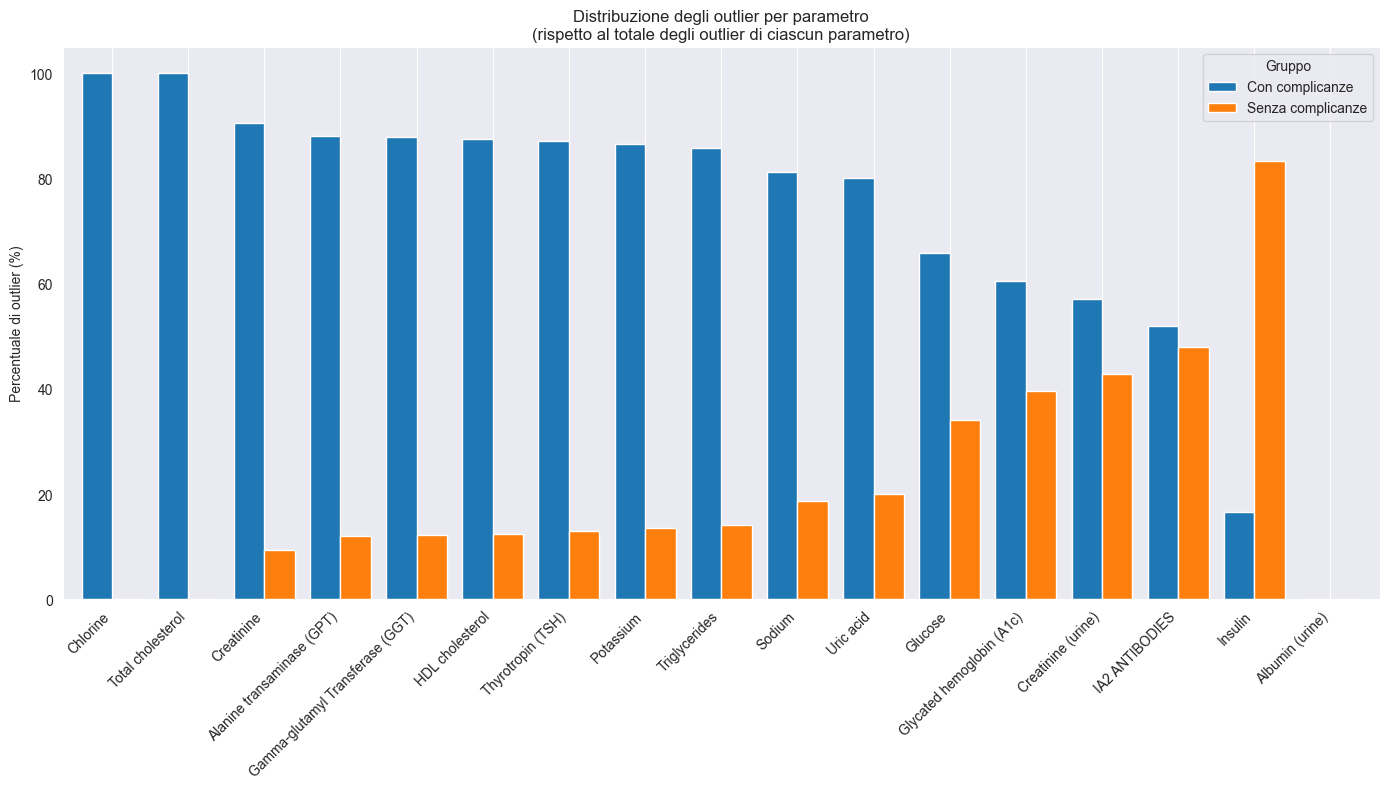

In [30]:
def calcola_percentuali_outlier_rispetto_al_totale(df_completo, df_con, df_senza):
    percentuali_con = {}
    percentuali_senza = {}

    for parametro, gruppo_completo in df_completo.groupby("Parametro"):
        valori_completi = pd.to_numeric(gruppo_completo["Valore"], errors="coerce").dropna()
        if len(valori_completi) == 0:
            percentuali_con[parametro] = 0.0
            percentuali_senza[parametro] = 0.0
            continue

        z_scores = modified_z_score(valori_completi)
        outlier_mask = np.abs(z_scores) > 5
        outliers_parametro = gruppo_completo[outlier_mask]

        totale_outliers = len(outliers_parametro)
        if totale_outliers == 0:
            percentuali_con[parametro] = 0.0
            percentuali_senza[parametro] = 0.0
            continue

        # Conta quanti outlier per quel parametro ci sono in ciascun gruppo
        outliers_con = outliers_parametro[outliers_parametro.index.isin(df_con.index)]
        outliers_senza = outliers_parametro[outliers_parametro.index.isin(df_senza.index)]

        percentuali_con[parametro] = 100 * len(outliers_con) / totale_outliers
        percentuali_senza[parametro] = 100 * len(outliers_senza) / totale_outliers

    return (
        pd.Series(percentuali_con, name="Con complicanze"),
        pd.Series(percentuali_senza, name="Senza complicanze")
    )

# Calcola percentuali rispetto al totale di outlier per ogni parametro
percentuali_con, percentuali_senza = calcola_percentuali_outlier_rispetto_al_totale(
    df1, df_con_complicanze, df_senza_complicanze
)

# Combina i risultati
df_outliers = pd.concat([percentuali_con, percentuali_senza], axis=1).fillna(0)
df_outliers = df_outliers.sort_values(by="Con complicanze", ascending=False)

# Plot
plt.figure(figsize=(14, 8))
df_outliers.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.ylabel("Percentuale di outlier (%)")
plt.title("Distribuzione degli outlier per parametro\n(rispetto al totale degli outlier di ciascun parametro)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title="Gruppo")
plt.show()

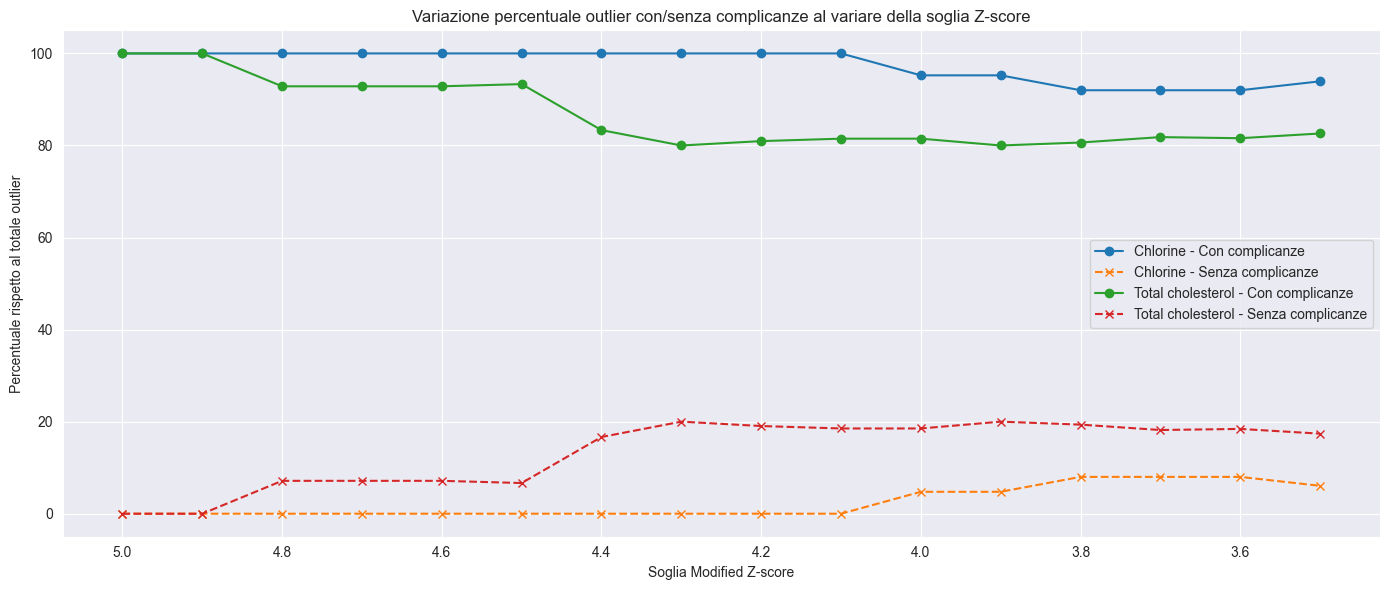

In [31]:
def analizza_andamento_outlier(df_completo, df_con, df_senza, parametri, soglie):
    risultati = []

    for soglia in soglie:
        for parametro in parametri:
            gruppo = df_completo[df_completo["Parametro"] == parametro]
            valori = pd.to_numeric(gruppo["Valore"], errors="coerce").dropna()
            if len(valori) == 0:
                continue

            z_scores = modified_z_score(valori)
            outlier_mask = np.abs(z_scores) > soglia
            outliers = gruppo[outlier_mask]

            totale_outliers = len(outliers)
            if totale_outliers == 0:
                percent_con = 0.0
                percent_senza = 0.0
            else:
                outliers_con = outliers[outliers.index.isin(df_con.index)]
                outliers_senza = outliers[outliers.index.isin(df_senza.index)]
                percent_con = 100 * len(outliers_con) / totale_outliers
                percent_senza = 100 * len(outliers_senza) / totale_outliers

            risultati.append({
                "Parametro": parametro,
                "Soglia": soglia,
                "Con complicanze": percent_con,
                "Senza complicanze": percent_senza,
                "Totale outlier": totale_outliers
            })

    return pd.DataFrame(risultati)

# Parametri da analizzare
parametri_da_studiare = ["Chlorine", "Total cholesterol"]
soglie = np.arange(5.0, 3.4, -0.1)  # Da 5.0 a 3.5 con passo -0.1

# Calcolo
df_risultati = analizza_andamento_outlier(df1, df_con_complicanze, df_senza_complicanze, parametri_da_studiare, soglie)

plt.figure(figsize=(14, 6))
for parametro in parametri_da_studiare:
    subset = df_risultati[df_risultati["Parametro"] == parametro]
    plt.plot(subset["Soglia"], subset["Con complicanze"], label=f"{parametro} - Con complicanze", marker='o')
    plt.plot(subset["Soglia"], subset["Senza complicanze"], label=f"{parametro} - Senza complicanze", linestyle='--', marker='x')

plt.gca().invert_xaxis()  # Inverti asse X per mostrare la soglia decrescente
plt.xlabel("Soglia Modified Z-score")
plt.ylabel("Percentuale rispetto al totale outlier")
plt.title("Variazione percentuale outlier con/senza complicanze al variare della soglia Z-score")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

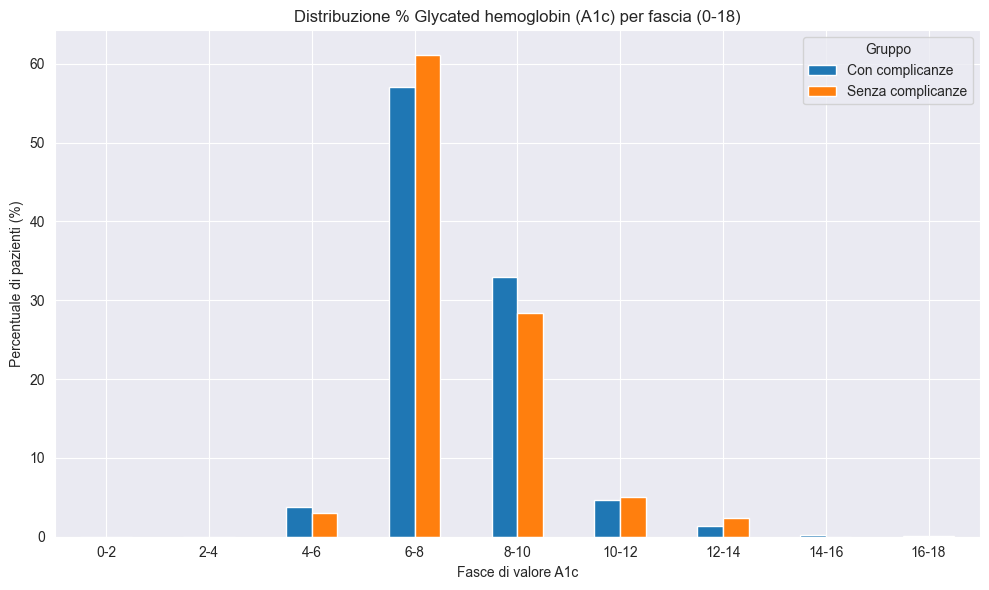

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Filtra solo i valori A1c
a1c_con_raw = df_con_complicanze[df_con_complicanze["Parametro"] == "Glycated hemoglobin (A1c)"]
a1c_senza_raw = df_senza_complicanze[df_senza_complicanze["Parametro"] == "Glycated hemoglobin (A1c)"]

# 2. Converte in numerico (float), rimuovendo eventuali errori
a1c_con = pd.to_numeric(a1c_con_raw["Valore"], errors="coerce").dropna()
a1c_senza = pd.to_numeric(a1c_senza_raw["Valore"], errors="coerce").dropna()

# 3. Definisci le fasce 0â€“2, 2â€“4, ..., 16â€“18
bins = np.arange(0, 20, 2)
labels = [f"{i}-{i+2}" for i in bins[:-1]]

# 4. Fasce con pd.cut()
a1c_con_binned = pd.cut(a1c_con, bins=bins, labels=labels, right=False)
a1c_senza_binned = pd.cut(a1c_senza, bins=bins, labels=labels, right=False)

# 5. Frequenze normalizzate (percentuali)
freq_con = a1c_con_binned.value_counts(normalize=True).sort_index() * 100
freq_senza = a1c_senza_binned.value_counts(normalize=True).sort_index() * 100

# 6. Crea DataFrame per il grafico
df_plot = pd.DataFrame({
    "Con complicanze": freq_con,
    "Senza complicanze": freq_senza
})

# 7. Plot
df_plot.plot(kind="bar", figsize=(10, 6))
plt.title("Distribuzione % Glycated hemoglobin (A1c) per fascia (0-18)")
plt.xlabel("Fasce di valore A1c")
plt.ylabel("Percentuale di pazienti (%)")
plt.xticks(rotation=0)
plt.legend(title="Gruppo")
plt.tight_layout()
plt.show()

In [17]:
df1["Data"] = pd.to_datetime(df1["Data"])

# Ottieni la prima data per ogni parametro per ciascun paziente
first_dates = df1.groupby(["ID", "Parametro"])["Data"].min().reset_index()
first_dates

ID                   Parametro       Data
0      LIB193265  Alanine transaminase (GPT) 2018-09-05
1      LIB193265             Albumin (urine) 2021-01-18
2      LIB193265                    Chlorine 2018-09-05
3      LIB193265                  Creatinine 2018-09-05
4      LIB193265          Creatinine (urine) 2021-01-18
...          ...                         ...        ...
10584  LIB194166                      Sodium 2020-12-10
10585  LIB194166           Thyrotropin (TSH) 2020-12-10
10586  LIB194166           Total cholesterol 2020-12-10
10587  LIB194166               Triglycerides 2020-12-10
10588  LIB194166                   Uric acid 2022-02-10

[10589 rows x 3 columns]

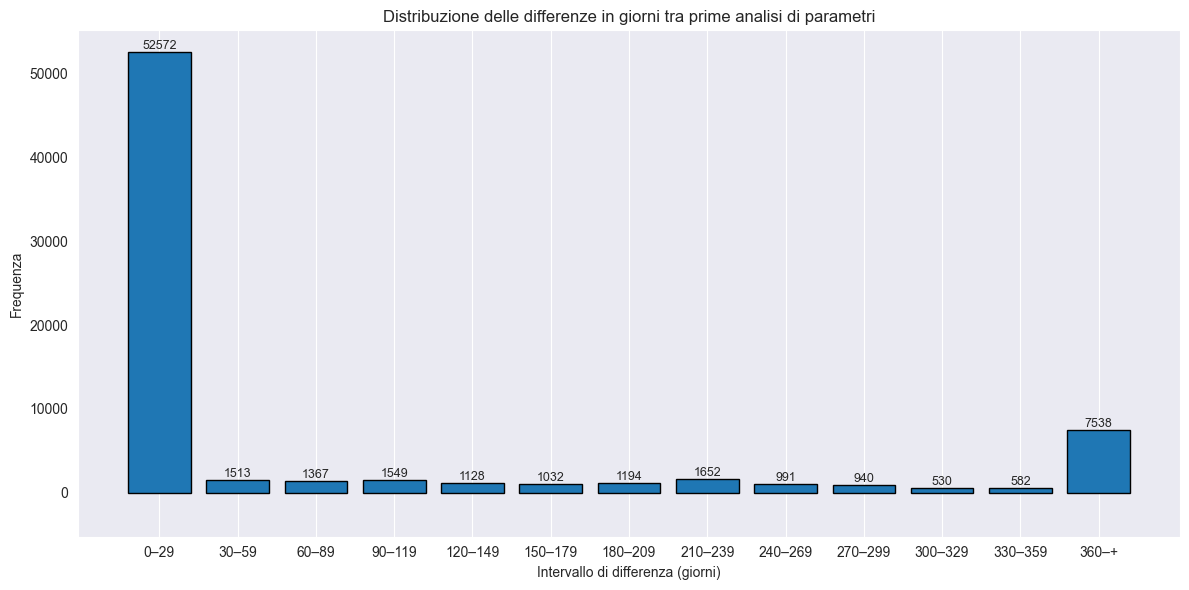

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

records = []

for patient_id, group in first_dates.groupby("ID"):
    params = group.set_index("Parametro")["Data"].to_dict()
    for (p1, p2) in combinations(params.keys(), 2):
        delta = abs((params[p1] - params[p2]).days)
        records.append({
            "ID": patient_id,
            "Parametro 1": p1,
            "Parametro 2": p2,
            "Differenza giorni": delta
        })

df_diff = pd.DataFrame(records)

# ðŸŽ¯ Definizione intervalli
bin_ranges = [(i, i+29) for i in range(0, 360, 30)]
bin_ranges.append((360, float('inf')))  # Ultimo intervallo: 360+

# Etichette leggibili
bin_labels = [f"{start}â€“{end if end != float('inf') else '+'}" for start, end in bin_ranges]

# Conta quanti valori cadono in ciascun intervallo
bin_counts = []
for start, end in bin_ranges:
    count = df_diff[
        (df_diff["Differenza giorni"] >= start) &
        (df_diff["Differenza giorni"] <= end if end != float('inf') else True)
    ].shape[0]
    bin_counts.append(count)

# ðŸŽ¨ Grafico a barre con larghezza costante
plt.figure(figsize=(12, 6))
bars = plt.bar(bin_labels, bin_counts, edgecolor='black')

# Etichette sopra e sotto
for bar, count in zip(bars, bin_counts):
    x = bar.get_x() + bar.get_width() / 2
    if count > 0:
        plt.text(x, count, str(count), ha='center', va='bottom', fontsize=9)

plt.title("Distribuzione delle differenze in giorni tra prime analisi di parametri")
plt.xlabel("Intervallo di differenza (giorni)")
plt.ylabel("Frequenza")
plt.grid(axis='y')
plt.tight_layout()
plt.ylim(bottom=-max(bin_counts)*0.1)
plt.show()

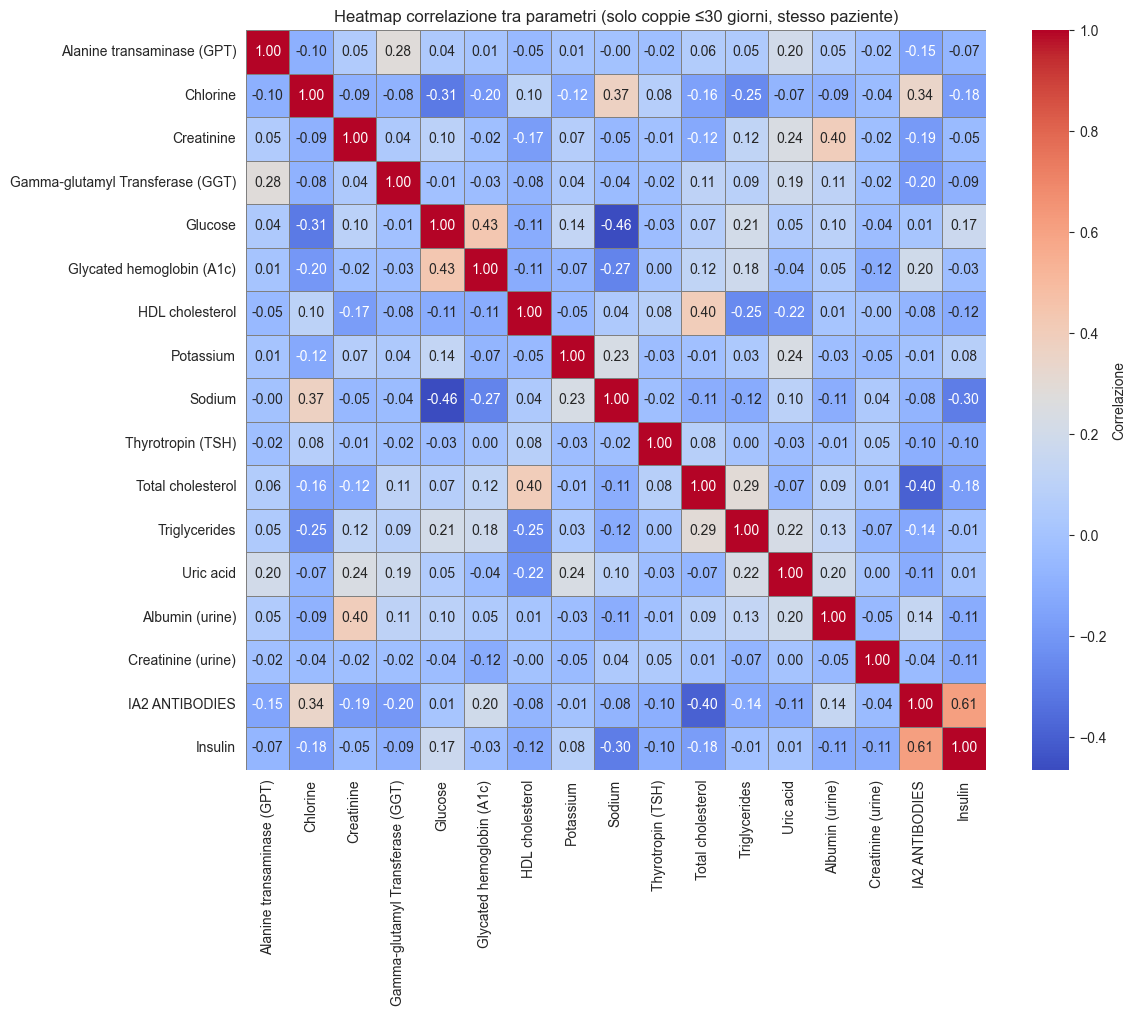

In [21]:
records = []

# Analisi per paziente
for patient_id, group in first_dates.groupby("ID"):
    # Dizionari per data e valore per parametro
    date_dict = group.set_index("Parametro")["Data"].to_dict()
    value_dict = df1[df1["ID"] == patient_id].groupby("Parametro")["Valore"].first().to_dict()

    for p1, p2 in combinations(date_dict.keys(), 2):
        delta_days = abs((date_dict[p1] - date_dict[p2]).days)
        if delta_days <= 30:
            val1 = pd.to_numeric(value_dict.get(p1), errors="coerce")
            val2 = pd.to_numeric(value_dict.get(p2), errors="coerce")
            if pd.notna(val1) and pd.notna(val2):
                records.append({
                    "ID": patient_id,
                    p1: val1,
                    p2: val2
                })

# Trasforma in DataFrame
df_corr_raw = pd.DataFrame(records)

# Raggruppa per ID e calcola la media dei valori duplicati
df_corr_wide = df_corr_raw.groupby("ID").mean(numeric_only=True)

# Calcola matrice di correlazione
correlation_matrix = df_corr_wide.corr()

# Plot della heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={'label': 'Correlazione'}, linewidths=0.5, linecolor='gray')
plt.title("Heatmap correlazione tra parametri (solo coppie â‰¤30 giorni, stesso paziente)")
plt.tight_layout()
plt.show()

C:\Users\gabry\AppData\Local\Temp\ipykernel_26192\3841154665.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con_complicanze["Complicanze"] = "Con complicanze"
C:\Users\gabry\AppData\Local\Temp\ipykernel_26192\3841154665.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_senza_complicanze["Complicanze"] = "Senza complicanze"


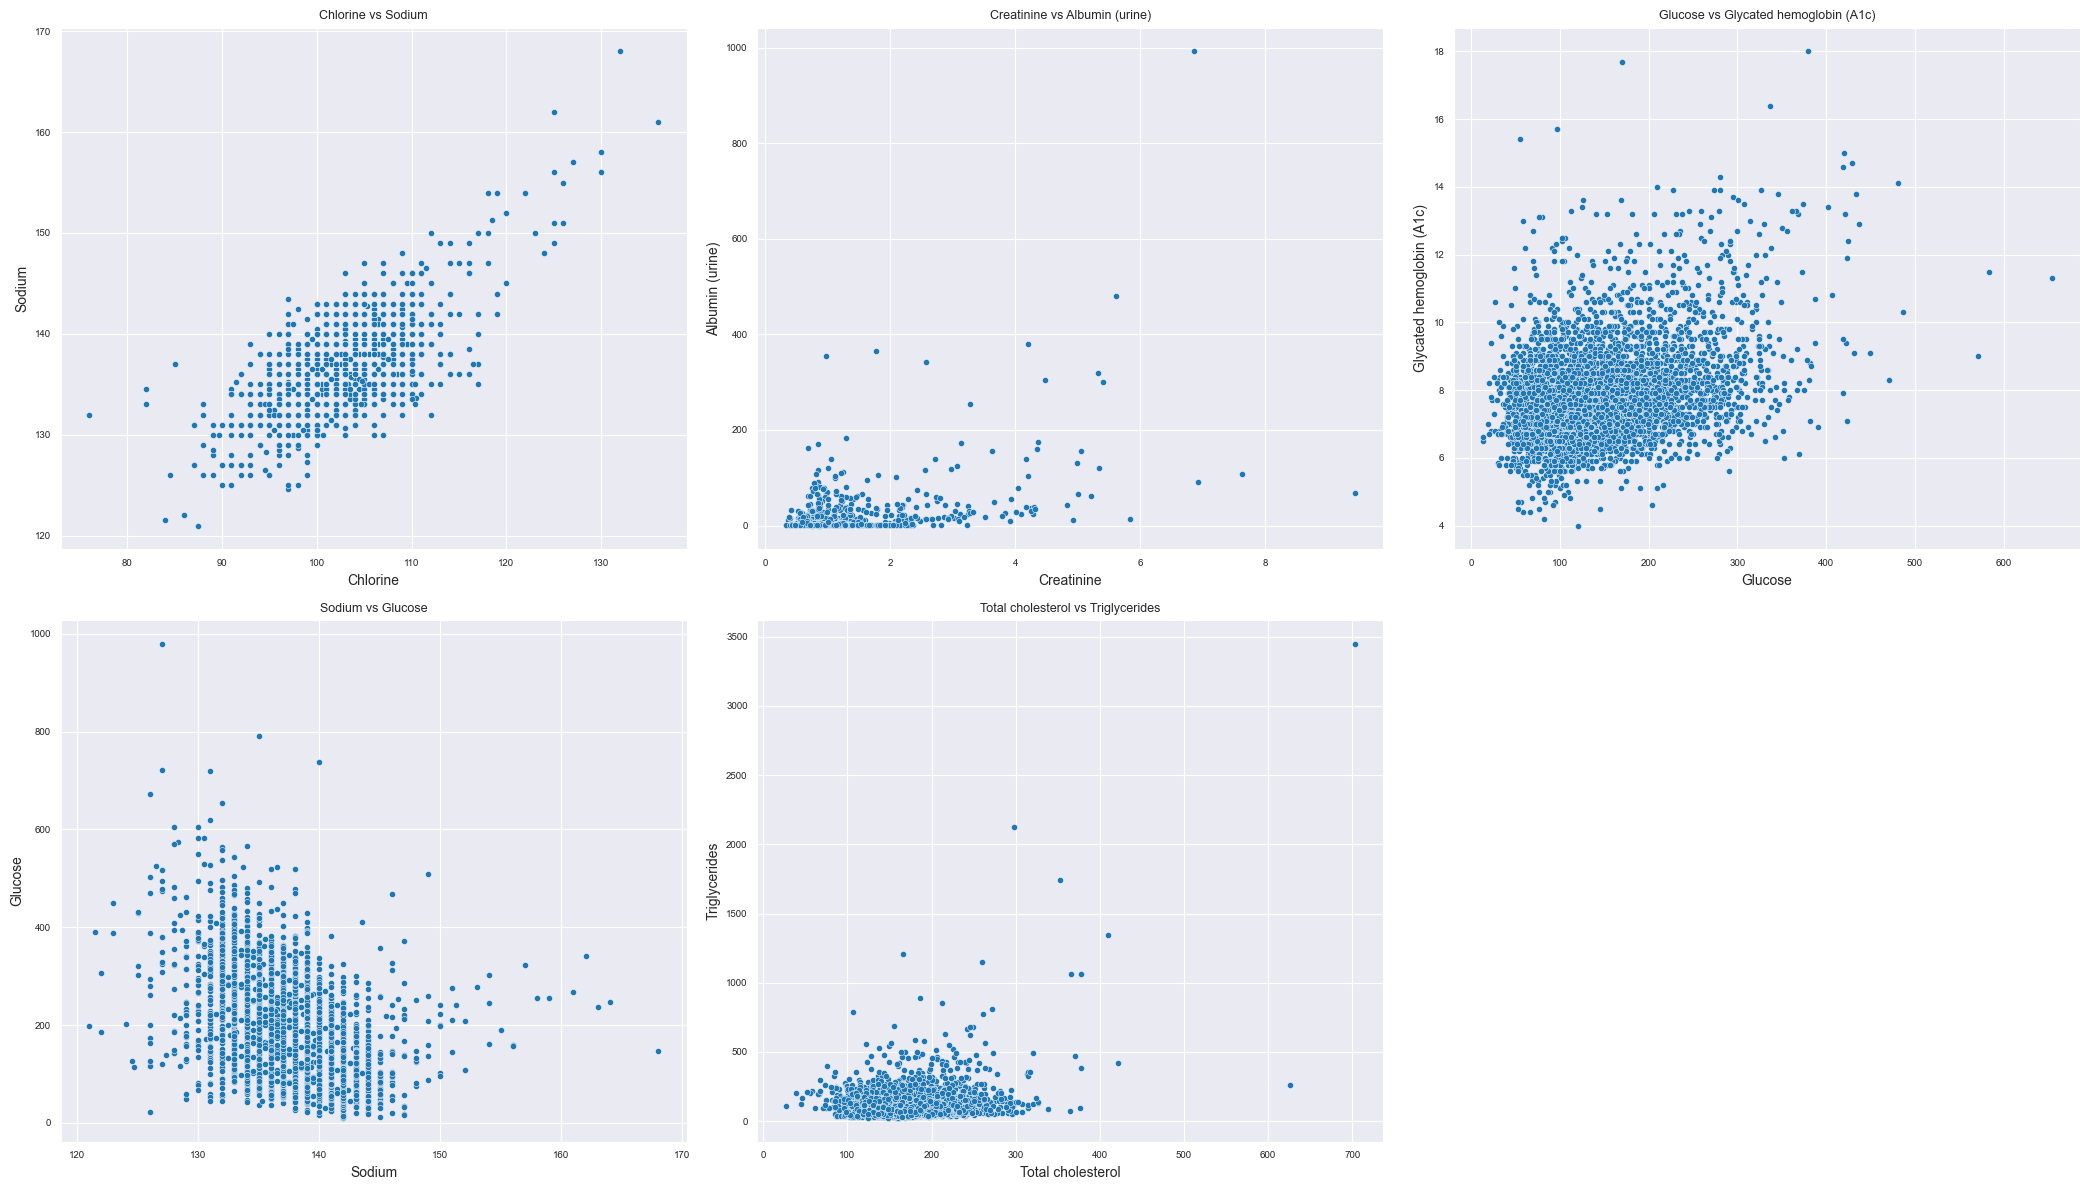

In [25]:
from itertools import combinations
from datetime import datetime, timedelta

# Parametri interessanti dalla heatmap (puoi modificarli o estenderli)
combinazioni_interessanti = [
    ("Chlorine", "Sodium"),
    #("Chlorine", "IA2 ANTIBODIES"),
    ("Creatinine", "Albumin (urine)"),
    ("Glucose", "Glycated hemoglobin (A1c)"),
    ("Sodium", "Glucose"),  # Correlazione negativa
    ("Total cholesterol", "Triglycerides")
    #("Total cholesterol", "IA2 ANTIBODIES"), # Correlazione negativa
    #("IA2 ANTIBODIES", "Insulin")
]

# Crea la colonna "Complicanze"
df_con_complicanze["Complicanze"] = "Con complicanze"
df_senza_complicanze["Complicanze"] = "Senza complicanze"

# Unione dei due dataset
df_merged = pd.concat([df_con_complicanze, df_senza_complicanze], ignore_index=True)

# Parametri da escludere
parametri_da_escludere = {"Insulin", "IA2 ANTIBODIES"}

# Lista di tutti i parametri unici presenti nel dataset
parametri_unici = df_merged["Parametro"].unique()

# Tutte le combinazioni possibili escludendo quelle con parametri indesiderati
#combinazioni_interessanti = [
#    (p1, p2) for p1, p2 in combinations(parametri_unici, 2)
#    if p1 not in parametri_da_escludere and p2 not in parametri_da_escludere
#]

# Conversione a numerico e datetime
df_merged["Valore"] = pd.to_numeric(df_merged["Valore"], errors="coerce")
df_merged["Data"] = pd.to_datetime(df_merged["Data"], errors="coerce")

# Prepara i subplot
n = len(combinazioni_interessanti)
cols = 3
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 6 * rows))
axes = axes.flatten()

# Loop per ogni coppia
for i, (p1, p2) in enumerate(combinazioni_interessanti):
    if p1 in df_merged["Parametro"].unique() and p2 in df_merged["Parametro"].unique():
        # Estrai solo i dati rilevanti per questi due parametri
        df_pair = df_merged[df_merged["Parametro"].isin([p1, p2])]

        # Pivot temporaneo per confronto tra i due
        df_pair_pivot = df_pair.pivot_table(
            index=["ID", "Data", "Complicanze"],
            columns="Parametro",
            values="Valore",
            aggfunc="mean"
        ).reset_index()

        # Elimina righe dove uno dei due parametri manca
        df_pair_pivot = df_pair_pivot.dropna(subset=[p1, p2])

        # Per ogni ID, tieni solo le righe dove la differenza tra le date Ã¨ <= 30 giorni
        df_filtered = []
        for (id_, comp), group in df_pair_pivot.groupby(["ID", "Complicanze"]):
            group_sorted = group.sort_values("Data")
            for idx, row in group_sorted.iterrows():
                current_date = row["Data"]
                mask = (group_sorted["Data"] >= current_date - timedelta(days=30)) & (group_sorted["Data"] <= current_date + timedelta(days=30))
                nearby = group_sorted[mask]
                df_filtered.append(nearby)

        df_final = pd.concat(df_filtered).drop_duplicates()

        if not df_final.empty:
            sns.scatterplot(data=df_final, x=p1, y=p2, ax=axes[i], s=20)
            axes[i].set_title(f"{p1} vs {p2}", fontsize=9)
            axes[i].tick_params(labelsize=7)
            axes[i].grid(True)
        else:
            axes[i].text(0.5, 0.5, "Nessun dato entro 30 giorni", ha='center', va='center', fontsize=8)
            axes[i].set_axis_off()
    else:
        axes[i].text(0.5, 0.5, f"Parametri non trovati:\n{p1}, {p2}",
                     ha='center', va='center', fontsize=8)
        axes[i].set_axis_off()

# Rimuove eventuali assi in eccesso
for j in range(i + 1, len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()